# Data Management Python: A comprehensive Excercise

### 1) Load the following python libraries pandas, numpy, matplotlib, os, and other you see necessary as you work

Below is how you install (commented) and load different libraries.

In [16]:
## pip install numpy
# import numpy library as np 
import numpy as np 

## pip install pandas
# import pandas library as pd 
import pandas as pd 

# import matplotlib.pyplot library as plt 
import matplotlib.pyplot as plt

# importing os module
import os

#pip install plotnine --user
## https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-altering-colors.html
import plotnine as pltnine
from plotnine import *

%matplotlib inline

import datetime
import missingno as msno

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


### 2) Import the following .csv (https://raw.github.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/tips.csv") file:

In [8]:
#read in the  tips data
tips = pd.read_csv("https://raw.github.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 3) Use the pandas to_stata and from from_stata functions to export the data as a stata file and import this back into python.

For this question, we use the `tips` dataset , convert it to a Stata file and then load it back. 

In [4]:
# Check whether data folder exists or not
isExist = os.path.exists('data')
if not isExist:
   # Create a new directory because it does not exist 
  os.mkdir('data') 
  print("The data directory is created!")
## save the tips file to Stata
tips.to_stata('data/tips.dta')  

In [9]:
##import the tips Stata data 
tips_dta = pd.read_stata('data/tips.dta') 
tips_dta

,index,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### 4) Show the first 15  observations, count how many rows are in the dataset and show the last 4 observations.

We use the loaded Stata data to show the first 15 observations and count the rows in the data

In [6]:
## Select first 15 rows.
## Remember python starts from zero
tips_dta.head(15)

,index,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
#Counting the number of rows using the shape function
count_row = tips_dta.shape[0]  # Gives number of rows, to count the columns shape[1]

#you can estimate the rows by estimating the length of a non missing variable like index
count_len = len(tips_dta.index)

print("Number of rows from shape", count_row , " and from Len", count_len)

Number of rows from shape 244  and from Len 244


### 5) Create two new variables (columns) half_bill which is 50% of the total bill and perc_bill (percentage bill) which show the % of the tips for each total bill.

In [8]:
#half_bill which is 50% of the total bill
##Compute and append half_bill to  tips_dta
tips_dta['half_bill'] = tips_dta.total_bill/2
tips_dta

,index,total_bill,tip,sex,smoker,day,time,size,half_bill
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495
1,1,10.34,1.66,Male,No,Sun,Dinner,3,5.170
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840
4,4,24.59,3.61,Female,No,Sun,Dinner,4,12.295
...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,14.515
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335
242,242,17.82,1.75,Male,No,Sat,Dinner,2,8.910


In [9]:
# perc_bill (percentage bill) which show the % of the tips for each total bill.
tips_dta['perc_bill'] = (tips_dta.tip/tips_dta.total_bill)*100
tips_dta

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495,5.944673
1,1,10.34,1.66,Male,No,Sun,Dinner,3,5.170,16.054159
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505,16.658734
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840,13.978041
4,4,24.59,3.61,Female,No,Sun,Dinner,4,12.295,14.680765
...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,14.515,20.392697
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590,7.358352
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335,8.822232
242,242,17.82,1.75,Male,No,Sat,Dinner,2,8.910,9.820426


### 6. Perform relevant descriptive statistics on each and every one of these variables.
We will use the describe function to get all the relevant desctriptive statistics

In [10]:
#we estimate all the relevant descriptive stats using describe function
## you can also do median = tips_dta['half_bill'].median()
tips_dta['half_bill'].describe()

count    244.000000
mean       9.892971
std        4.451206
min        1.535000
25%        6.673750
50%        8.897500
75%       12.063750
max       25.405000
Name: half_bill, dtype: float64

In [11]:
#we estimate all the relevant descriptive stats using describe function
tips_dta['perc_bill'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: perc_bill, dtype: float64

In [12]:
pd.crosstab(tips_dta['sex'], tips_dta['sex'])

sex,Female,Male
sex,,
Female,87,0
Male,0,157


### 7. Perform descriptive statistics and use the groupby function

We group our data by sex and then estimate the stats

In [13]:
# Group data by sex then estimate the descriptive stats
grouped_tips_df = tips_dta.groupby('sex')
grouped_tips_df['half_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,9.028448,4.004604,1.535,6.375,8.200,10.760,22.150
Male,157.0,10.372038,4.623234,3.625,7.000,9.175,12.355,25.405


In [14]:
# Group data by sex then estimate the descriptive stats
grouped_tips_df['perc_bill'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,16.649074,5.363173,5.643341,14.041645,15.558149,19.426621,41.666667
Male,157.0,15.765055,6.477787,3.563814,12.138869,15.349194,18.623962,71.034483


In [15]:
##try this
grouped_tips_df[['perc_bill','half_bill']].describe()

perc_bill                                                       \
           count       mean       std       min        25%        50%   
sex                                                                     
Female      87.0  16.649074  5.363173  5.643341  14.041645  15.558149   
Male       157.0  15.765055  6.477787  3.563814  12.138869  15.349194   

                             half_bill                                     \
              75%        max     count       mean       std    min    25%   
sex                                                                         
Female  19.426621  41.666667      87.0   9.028448  4.004604  1.535  6.375   
Male    18.623962  71.034483     157.0  10.372038  4.623234  3.625  7.000   

                               
          50%     75%     max  
sex                            
Female  8.200  10.760  22.150  
Male    9.175  12.355  25.405

### 8. Merging and appending the data:
  a. Slice the full data into two parts based on the variables and ensure you keep a common index variable.    
  b. Use any appropriate merge to bring these data back together   
  c. Cut the data into two parts, rows above and some below with the same variable names  
  d. Use the appropriate appending functions to rejoin these two together  

#### a. Slice the full data into two parts based on the variables and ensure you keep a common index variable.

In [16]:
##Create subset 1
tips_dta.shape
tips_sub1 = tips_dta[["index","total_bill", "tip","half_bill","perc_bill"]]
tips_sub1

,index,total_bill,tip,half_bill,perc_bill
0,0,16.99,1.01,8.495,5.944673
1,1,10.34,1.66,5.170,16.054159
2,2,21.01,3.50,10.505,16.658734
3,3,23.68,3.31,11.840,13.978041
4,4,24.59,3.61,12.295,14.680765
...,...,...,...,...,...
239,239,29.03,5.92,14.515,20.392697
240,240,27.18,2.00,13.590,7.358352
241,241,22.67,2.00,11.335,8.822232
242,242,17.82,1.75,8.910,9.820426


In [17]:
##Create subset 2
tips_sub2 = tips_dta[["index","sex", "smoker","day","time","size"]]
tips_sub2

,index,sex,smoker,day,time,size
0,0,Female,No,Sun,Dinner,2
1,1,Male,No,Sun,Dinner,3
2,2,Male,No,Sun,Dinner,3
3,3,Male,No,Sun,Dinner,2
4,4,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,239,Male,No,Sat,Dinner,3
240,240,Female,Yes,Sat,Dinner,2
241,241,Male,Yes,Sat,Dinner,2
242,242,Male,No,Sat,Dinner,2


#### b. Use any appropriate merge to bring these data back together

In [18]:
#subset 1
print(tips_sub1.head(5))
##subset 2
print(tips_sub2.head(5))

## merge the data subsets
tips_merge = pd.merge(tips_sub1,tips_sub2, how='left', on='index')
tips_merge

   index  total_bill   tip  half_bill  perc_bill
0      0       16.99  1.01      8.495   5.944673
1      1       10.34  1.66      5.170  16.054159
2      2       21.01  3.50     10.505  16.658734
3      3       23.68  3.31     11.840  13.978041
4      4       24.59  3.61     12.295  14.680765
   index     sex smoker  day    time  size
0      0  Female     No  Sun  Dinner     2
1      1    Male     No  Sun  Dinner     3
2      2    Male     No  Sun  Dinner     3
3      3    Male     No  Sun  Dinner     2
4      4  Female     No  Sun  Dinner     4


,index,total_bill,tip,half_bill,perc_bill,sex,smoker,day,time,size
0,0,16.99,1.01,8.495,5.944673,Female,No,Sun,Dinner,2
1,1,10.34,1.66,5.170,16.054159,Male,No,Sun,Dinner,3
2,2,21.01,3.50,10.505,16.658734,Male,No,Sun,Dinner,3
3,3,23.68,3.31,11.840,13.978041,Male,No,Sun,Dinner,2
4,4,24.59,3.61,12.295,14.680765,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,14.515,20.392697,Male,No,Sat,Dinner,3
240,240,27.18,2.00,13.590,7.358352,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,11.335,8.822232,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,8.910,9.820426,Male,No,Sat,Dinner,2


#### Cut the data into two parts, rows above and some below with the same variable names

In [19]:
# in this first example we split the data into to two datasets,1) with a total_bill of > 15 and 2) <=15
## select only rows that have a total bill greater than 15
tips_gt15 = tips_dta[tips_dta.total_bill > 15]
tips_lt16 = tips_dta[tips_dta.total_bill <= 15]
#subset >15
print("--------------Subset total bill >15----------------")
print(tips_gt15.head(5))

print("--------------Subset  total bill <=15-----------------")

##subset <= 15
print(tips_lt16.head(5))

--------------Subset total bill >15----------------
   index  total_bill   tip     sex smoker  day    time  size  half_bill  \
0      0       16.99  1.01  Female     No  Sun  Dinner     2      8.495   
2      2       21.01  3.50    Male     No  Sun  Dinner     3     10.505   
3      3       23.68  3.31    Male     No  Sun  Dinner     2     11.840   
4      4       24.59  3.61  Female     No  Sun  Dinner     4     12.295   
5      5       25.29  4.71    Male     No  Sun  Dinner     4     12.645   

   perc_bill  
0   5.944673  
2  16.658734  
3  13.978041  
4  14.680765  
5  18.623962  
--------------Subset  total bill <=15-----------------
    index  total_bill   tip     sex smoker  day    time  size  half_bill  \
1       1       10.34  1.66    Male     No  Sun  Dinner     3      5.170   
6       6        8.77  2.00    Male     No  Sun  Dinner     2      4.385   
9       9       14.78  3.23    Male     No  Sun  Dinner     2      7.390   
10     10       10.27  1.71    Male     No  Sun 

From the above command we use the _>_  Logic in Python (and pandas). Below are some of the most common Logic in Python

![Subset DataFrames](images/df_logic.png)

In [20]:
## other ways to subset rows
## Select last n rows.
## Here we select the last 3 rows from the df_wide dataset
last_3 = tips_dta.tail(3)
## Select first n rows.
## Here we select the first 3 rows from the df_wide dataset
first_3 = tips_dta.head(3)

print(first_3)
print(last_3)

   index  total_bill   tip     sex smoker  day    time  size  half_bill  \
0      0       16.99  1.01  Female     No  Sun  Dinner     2      8.495   
1      1       10.34  1.66    Male     No  Sun  Dinner     3      5.170   
2      2       21.01  3.50    Male     No  Sun  Dinner     3     10.505   

   perc_bill  
0   5.944673  
1  16.054159  
2  16.658734  
     index  total_bill   tip     sex smoker   day    time  size  half_bill  \
241    241       22.67  2.00    Male    Yes   Sat  Dinner     2     11.335   
242    242       17.82  1.75    Male     No   Sat  Dinner     2      8.910   
243    243       18.78  3.00  Female     No  Thur  Dinner     2      9.390   

     perc_bill  
241   8.822232  
242   9.820426  
243  15.974441  


In [23]:
#appending 2 datasets
tips_append = tips_gt15.append(tips_lt16)
tips_append

<ipython-input-23-50020081a439>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495,5.944673
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505,16.658734
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840,13.978041
4,4,24.59,3.61,Female,No,Sun,Dinner,4,12.295,14.680765
5,5,25.29,4.71,Male,No,Sun,Dinner,4,12.645,18.623962
...,...,...,...,...,...,...,...,...,...,...
228,228,13.28,2.72,Male,No,Sat,Dinner,2,6.640,20.481928
232,232,11.61,3.39,Male,No,Sat,Dinner,2,5.805,29.198966
233,233,10.77,1.47,Male,No,Sat,Dinner,2,5.385,13.649025
235,235,10.07,1.25,Male,No,Sat,Dinner,2,5.035,12.413108


### 9. List only the following:
    a. Total bills greater than 10
    b. Top 5 percentage tips
    c. Average tip % for males and also for females, which is greater?
    d. Total bills less than 15, for females who had dinner
    e. All tips between 5% and 15%, sorted by the day of the week
    f. The first 7 rows (individuals)
    g. The last three columns (variables)
    h. The first three variables and the observations 5 to 9 (rows)
    i. Neither female nor eating on a Friday

#### a. Total bills greater than 10

In [20]:
## select only rows that have a total bill greater than 10
tips_gt10 = tips_dta[tips_dta.total_bill > 10]
tips_gt10

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495,5.944673
1,1,10.34,1.66,Male,No,Sun,Dinner,3,5.170,16.054159
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505,16.658734
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840,13.978041
4,4,24.59,3.61,Female,No,Sun,Dinner,4,12.295,14.680765
...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,14.515,20.392697
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590,7.358352
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335,8.822232
242,242,17.82,1.75,Male,No,Sat,Dinner,2,8.910,9.820426


#### b. Top 5 percentage tips

In [21]:
##Select and order top 5 percentage tips.
tips_gt10.nlargest(5, 'perc_bill')

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill
232,232,11.61,3.39,Male,No,Sat,Dinner,2,5.805,29.198966
183,183,23.17,6.50,Male,Yes,Sun,Dinner,4,11.585,28.053517
109,109,14.31,4.00,Female,Yes,Sat,Dinner,2,7.155,27.952481
93,93,16.32,4.30,Female,Yes,Fri,Dinner,2,8.160,26.348039
221,221,13.42,3.48,Female,Yes,Fri,Lunch,2,6.710,25.931446


#### c. Average tip % for males and also for females, which is greater?

In [24]:
# Group data by sex then estimate the descriptive stats
grouped_tips_df = tips_dta.groupby('sex')
tips_avg = grouped_tips_df['perc_bill'].mean()
print(type(tips_avg))
tips_avg
x=1000

<class 'pandas.core.series.Series'>


The average tip percentage for **Female** is **16.64** and for **Male** is **15.76**.

#### d. Total bills less than 15, for females who had dinner

In [23]:
## Here we select total_bills<15 , sex is Female and time is Dinnet
f_dinner = tips_dta.loc[(tips_dta['total_bill'] <15) & 
                        (tips_dta['sex'] =='Female') &
                       (tips_dta['time'] =='Dinner')]
f_dinner

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill
14,14,14.83,3.02,Female,No,Sun,Dinner,2,7.415,20.364127
16,16,10.33,1.67,Female,No,Sun,Dinner,3,5.165,16.166505
51,51,10.29,2.60,Female,No,Sun,Dinner,2,5.145,25.267250
67,67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.535,32.573290
74,74,14.73,2.20,Female,No,Sat,Dinner,2,7.365,14.935506
92,92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.875,17.391304
100,100,11.35,2.50,Female,Yes,Fri,Dinner,2,5.675,22.026432
109,109,14.31,4.00,Female,Yes,Sat,Dinner,2,7.155,27.952481
111,111,7.25,1.00,Female,No,Sat,Dinner,1,3.625,13.793103
158,158,13.39,2.61,Female,No,Sun,Dinner,2,6.695,19.492158


#### e. All tips between 5% and 15%, sorted by the day of the week

In [29]:
## Here we select tips between 5 and 15% then sort
tips_5_15 = tips_dta.loc[(tips_dta['perc_bill'] <15) & 
                        (tips_dta['perc_bill'] >5) ]
#Order rows day of the week
tips_5_15 = tips_5_15.sort_values('day',ascending=False)



,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill
127,127,14.52,2.00,Female,No,Thur,Lunch,2,7.260,13.774105
117,117,10.65,1.50,Female,No,Thur,Lunch,2,5.325,14.084507
146,146,18.64,1.36,Female,No,Thur,Lunch,3,9.320,7.296137
144,144,16.43,2.30,Female,No,Thur,Lunch,2,8.215,13.998783
142,142,41.19,5.00,Male,No,Thur,Lunch,5,20.595,12.138869
...,...,...,...,...,...,...,...,...,...,...
242,242,17.82,1.75,Male,No,Sat,Dinner,2,8.910,9.820426
40,40,16.04,2.24,Male,No,Sat,Dinner,3,8.020,13.965087
56,56,38.01,3.00,Male,Yes,Sat,Dinner,4,19.005,7.892660
57,57,26.41,1.50,Female,No,Sat,Dinner,2,13.205,5.679667


#### f. The first 7 rows (individuals)

In [25]:
## Selecting the first 7 individuals 
tips_dta.head(7)

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495,5.944673
1,1,10.34,1.66,Male,No,Sun,Dinner,3,5.170,16.054159
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505,16.658734
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840,13.978041
4,4,24.59,3.61,Female,No,Sun,Dinner,4,12.295,14.680765
5,5,25.29,4.71,Male,No,Sun,Dinner,4,12.645,18.623962
6,6,8.77,2.00,Male,No,Sun,Dinner,2,4.385,22.805017


#### g. The last three columns (variables)

In [26]:
## Select the columns by position
tips_dta.iloc[:,-3:]

,size,half_bill,perc_bill
0,2,8.495,5.944673
1,3,5.170,16.054159
2,3,10.505,16.658734
3,2,11.840,13.978041
4,4,12.295,14.680765
...,...,...,...
239,3,14.515,20.392697
240,2,13.590,7.358352
241,2,11.335,8.822232
242,2,8.910,9.820426


In [27]:
## select by name
#Select all columns between size and perc_bill (inclusive)
tips_dta.loc[:,'size':'perc_bill']

,size,half_bill,perc_bill
0,2,8.495,5.944673
1,3,5.170,16.054159
2,3,10.505,16.658734
3,2,11.840,13.978041
4,4,12.295,14.680765
...,...,...,...
239,3,14.515,20.392697
240,2,13.590,7.358352
241,2,11.335,8.822232
242,2,8.910,9.820426


#### h. The first three variables and the observations 5 to 9 (rows)

In [28]:
##We select rows and columns together
tips_dta.iloc[5:10,0:3]

,index,total_bill,tip
5,5,25.29,4.71
6,6,8.77,2.00
7,7,26.88,3.12
8,8,15.04,1.96
9,9,14.78,3.23


#### i. Neither female nor eating on a Friday

In [30]:
## Here we select tips between 5 and 15% then sort
tips_sub = tips_dta.loc[(tips_dta['sex'] !='Female') & 
                        (tips_dta['day'] != 'Fri') ]
tips_sub

tips_dta.loc[(tips_dta.sex !='Female') & 
                        (tips_dta.day != 'Fri') ]

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill
1,1,10.34,1.66,Male,No,Sun,Dinner,3,5.170,16.054159
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505,16.658734
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840,13.978041
5,5,25.29,4.71,Male,No,Sun,Dinner,4,12.645,18.623962
6,6,8.77,2.00,Male,No,Sun,Dinner,2,4.385,22.805017
...,...,...,...,...,...,...,...,...,...,...
236,236,12.60,1.00,Male,Yes,Sat,Dinner,2,6.300,7.936508
237,237,32.83,1.17,Male,Yes,Sat,Dinner,2,16.415,3.563814
239,239,29.03,5.92,Male,No,Sat,Dinner,3,14.515,20.392697
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335,8.822232


### 10. Changing and creating categorical data
    a. Create a new dummy variables for smoker call this smoker_bin
    b. Create a new binary variable for total_bill >10
    c. Create a new categorical variable for sex calling this gender with codes 1-
    Female and 2-Males
    d. If tipping correctly means giving 10% or more create a dummy variables to
    determine how many did not tip correctly
    e. Replace the variables times and day with their appropriately labelled codes

In [30]:
## a. Create a new dummy variables for smoker call this smoker_bin
## if you only have two choices to select from:
tips_dta['smoker_bin'] = np.where(tips_dta['smoker']=='No',0, 1)
tips_dta

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill,smoker_bin
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495,5.944673,0
1,1,10.34,1.66,Male,No,Sun,Dinner,3,5.170,16.054159,0
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505,16.658734,0
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840,13.978041,0
4,4,24.59,3.61,Female,No,Sun,Dinner,4,12.295,14.680765,0
...,...,...,...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3,14.515,20.392697,0
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590,7.358352,1
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335,8.822232,1
242,242,17.82,1.75,Male,No,Sat,Dinner,2,8.910,9.820426,0


In [31]:
# b. Create a new binary variable for total_bill >10
## if you only have two choices to select from:
tips_dta['total_bill_cat'] = np.where(tips_dta['total_bill']>10,'> 10', '<= 10')
tips_dta.sort_values('total_bill')

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill,smoker_bin,total_bill_cat
67,67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.535,32.573290,1,<= 10
92,92,5.75,1.00,Female,Yes,Fri,Dinner,2,2.875,17.391304,1,<= 10
111,111,7.25,1.00,Female,No,Sat,Dinner,1,3.625,13.793103,0,<= 10
172,172,7.25,5.15,Male,Yes,Sun,Dinner,2,3.625,71.034483,1,<= 10
149,149,7.51,2.00,Male,No,Thur,Lunch,2,3.755,26.631158,0,<= 10
...,...,...,...,...,...,...,...,...,...,...,...,...
182,182,45.35,3.50,Male,Yes,Sun,Dinner,3,22.675,7.717751,1,> 10
156,156,48.17,5.00,Male,No,Sun,Dinner,6,24.085,10.379905,0,> 10
59,59,48.27,6.73,Male,No,Sat,Dinner,4,24.135,13.942407,0,> 10
212,212,48.33,9.00,Male,No,Sat,Dinner,4,24.165,18.621974,0,> 10


In [32]:
#  c. Create a new categorical variable for sex calling this gender with codes 1-Female and 2-Males
## if you only have two choices to select from:
tips_dta['sex_cat'] = np.where(tips_dta['sex']=='Female',1, 2)
tips_dta.sort_values('sex_cat')

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill,smoker_bin,total_bill_cat,sex_cat
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495,5.944673,0,> 10,1
139,139,13.16,2.75,Female,No,Thur,Lunch,2,6.580,20.896657,0,> 10,1
137,137,14.15,2.00,Female,No,Thur,Lunch,2,7.075,14.134276,0,> 10,1
136,136,10.33,2.00,Female,No,Thur,Lunch,2,5.165,19.361084,0,> 10,1
135,135,8.51,1.25,Female,No,Thur,Lunch,2,4.255,14.688602,0,<= 10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,43,9.68,1.32,Male,No,Sun,Dinner,2,4.840,13.636364,0,<= 10,2
42,42,13.94,3.06,Male,No,Sun,Dinner,2,6.970,21.951220,0,> 10,2
41,41,17.46,2.54,Male,No,Sun,Dinner,2,8.730,14.547537,0,> 10,2
39,39,31.27,5.00,Male,No,Sat,Dinner,3,15.635,15.989767,0,> 10,2


In [33]:
# d. If tipping correctly means giving 10% or more create a dummy variables to determine how many did not tip correctly
## if you only have two choices to select from:
tips_dta['tip_correct'] = np.where(tips_dta['perc_bill']>=10,'Correct Tip', 'Low Tip')
## Select variables to view
tips_dta.loc[:,['total_bill','tip','perc_bill','tip_correct']].sort_values('perc_bill')

,total_bill,tip,perc_bill,tip_correct
237,32.83,1.17,3.563814,Low Tip
102,44.30,2.50,5.643341,Low Tip
57,26.41,1.50,5.679667,Low Tip
0,16.99,1.01,5.944673,Low Tip
187,30.46,2.00,6.565988,Low Tip
...,...,...,...,...
183,23.17,6.50,28.053517,Correct Tip
232,11.61,3.39,29.198966,Correct Tip
67,3.07,1.00,32.573290,Correct Tip
178,9.60,4.00,41.666667,Correct Tip


In [34]:
## If you have mutiple conditions
# create a list of our conditions
conditions = [
    (tips_dta['perc_bill'] < 10),
    (tips_dta['perc_bill'] >= 10) & (tips_dta['perc_bill'] <= 20),
    (tips_dta['perc_bill'] > 20) & (tips_dta['perc_bill'] <= 50),
    (tips_dta['perc_bill'] > 50)
    ]

# create a list of the values we want to assign for each condition
values = ['Low Tip', '10%-20%', '20%-50%', 'Over 50%']

# create a new column and use np.select to assign values to it using our lists as arguments
tips_dta['tip_cat'] = np.select(conditions, values)
tips_dta.loc[:,['total_bill','tip','perc_bill','tip_correct','tip_cat']]

,total_bill,tip,perc_bill,tip_correct,tip_cat
0,16.99,1.01,5.944673,Low Tip,Low Tip
1,10.34,1.66,16.054159,Correct Tip,10%-20%
2,21.01,3.50,16.658734,Correct Tip,10%-20%
3,23.68,3.31,13.978041,Correct Tip,10%-20%
4,24.59,3.61,14.680765,Correct Tip,10%-20%
...,...,...,...,...,...
239,29.03,5.92,20.392697,Correct Tip,20%-50%
240,27.18,2.00,7.358352,Low Tip,Low Tip
241,22.67,2.00,8.822232,Low Tip,Low Tip
242,17.82,1.75,9.820426,Low Tip,Low Tip


In [35]:
## e. Replace the variables times and day with their appropriately labelled codes

### 11. Dates and working with dates: Create fake dates of birth for the first 5 participants, subtract these from today’s [whichever day you will be doing this on is also fine] and compute the new variable age for these first five.

In [36]:
## Select the first 5 paritcipants
top_5 = tips_dta.head(n=5)
top_5

,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill,smoker_bin,total_bill_cat,sex_cat,tip_correct,tip_cat
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495,5.944673,0,> 10,1,Low Tip,Low Tip
1,1,10.34,1.66,Male,No,Sun,Dinner,3,5.170,16.054159,0,> 10,2,Correct Tip,10%-20%
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505,16.658734,0,> 10,2,Correct Tip,10%-20%
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840,13.978041,0,> 10,2,Correct Tip,10%-20%
4,4,24.59,3.61,Female,No,Sun,Dinner,4,12.295,14.680765,0,> 10,1,Correct Tip,10%-20%


In [37]:
#https://datatofish.com/strings-to-datetime-pandas/

## Select the first 5 paritcipants
top_5 = tips_dta.head(n=5)
top_5
### add 5 dates to the data frame
top_5['dob'] = (['2015-12-25', '2014-12-26','2013-04-25', '2014-08-23',  '1980-08-23'])
## convert from string to date
top_5['dob'] = pd.to_datetime(top_5['dob'], format='%Y-%m-%d')
#get todays time 
now = pd.Timestamp('now')
##calculate age
top_5['age_yrs'] = (now - top_5['dob']).astype('<m8[Y]') 
top_5

<ipython-input-37-da04e48f042a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-37-da04e48f042a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-37-da04e48f042a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,total_bill,tip,sex,smoker,day,time,size,half_bill,perc_bill,smoker_bin,total_bill_cat,sex_cat,tip_correct,tip_cat,dob,age_yrs
0,0,16.99,1.01,Female,No,Sun,Dinner,2,8.495,5.944673,0,> 10,1,Low Tip,Low Tip,2015-12-25,6.0
1,1,10.34,1.66,Male,No,Sun,Dinner,3,5.170,16.054159,0,> 10,2,Correct Tip,10%-20%,2014-12-26,7.0
2,2,21.01,3.50,Male,No,Sun,Dinner,3,10.505,16.658734,0,> 10,2,Correct Tip,10%-20%,2013-04-25,8.0
3,3,23.68,3.31,Male,No,Sun,Dinner,2,11.840,13.978041,0,> 10,2,Correct Tip,10%-20%,2014-08-23,7.0
4,4,24.59,3.61,Female,No,Sun,Dinner,4,12.295,14.680765,0,> 10,1,Correct Tip,10%-20%,1980-08-23,41.0


### 12. Demonstrate the following functions with brief comments on your codes:
    a. Keeping of selected variables (columns)
    b. Keeping of selected individuals (rows)
    c. Dropping of selected variables (columns)
    d. Dropping of selected individuals (rows)
    e. Renaming variables

In [53]:
#a. Keeping of selected variables (columns)
tips_cols = tips_dta[["index","sex", "smoker","day","time","size"]]
#b. Keeping of selected individuals (rows)
tips_rows =  tips_dta.iloc[0:3,:]
#c. Dropping of selected variables (columns)
tips_cols_2= tips_dta.drop(columns=["index","sex", "smoker","day","time","size"], axis=1)
#d. Dropping of selected individuals (rows)
tips_row_2= tips_dta.drop(labels=[1,2])
##e. Renaming variables
tips_rename = tips_dta.rename(columns = {'sex':'gender'})
tips_rename

,index,total_bill,tip,gender,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


#### 13. Handling of missing data, demonstrate the following with comments:
    a. Deliberately introduce some missing data on the variables tips and total bill
    and save this with a different dataframe name
    b. Drop the rows if there are any missing data
    c. Use any three different methods under fillna to fill in missing values

In [10]:
## Deliberately introduce some missing data on the variables tips and total bill 
## and save this with a different dataframe name
df2 = {'total_bill': 30, 'sex': 'male', 'size': 4}
tips_add = tips_dta.append(df2, ignore_index = True)
tips_add

<ipython-input-10-ce8508f10edc>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,index,total_bill,tip,sex,smoker,day,time,size
0,0.0,16.99,1.01,Female,No,Sun,Dinner,2
1,1.0,10.34,1.66,Male,No,Sun,Dinner,3
2,2.0,21.01,3.50,Male,No,Sun,Dinner,3
3,3.0,23.68,3.31,Male,No,Sun,Dinner,2
4,4.0,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
240,240.0,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241.0,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242.0,17.82,1.75,Male,No,Sat,Dinner,2
243,243.0,18.78,3.00,Female,No,Thur,Dinner,2


__Recap:__

- _dropna_ function drop rows with any column having NA/null data and _fillna()_ replaces all NA/null data with value.

In [12]:
##b. Drop the rows if there are any missing data
### Quick check Any missing values?
tips_add.isnull().values.any()
## You can Count total NaN at each column in a DataFrame  by 
tips_add.isnull().sum()
## This calculates the frequency of missing per column  and stores them in a DataFrame
## Todo: could you save this as a csv
miss_freq = tips_add.isna().sum()/(len(tips_add))*100
## display the first 15 columns
miss_freq.head(15)

index         0.408163
total_bill    0.000000
tip           0.408163
sex           0.000000
smoker        0.408163
day           0.408163
time          0.408163
size          0.000000
dtype: float64

In [13]:
##  Drop the rows if there are any missing data
tips_add.dropna()

,index,total_bill,tip,sex,smoker,day,time,size
0,0.0,16.99,1.01,Female,No,Sun,Dinner,2
1,1.0,10.34,1.66,Male,No,Sun,Dinner,3
2,2.0,21.01,3.50,Male,No,Sun,Dinner,3
3,3.0,23.68,3.31,Male,No,Sun,Dinner,2
4,4.0,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239.0,29.03,5.92,Male,No,Sat,Dinner,3
240,240.0,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241.0,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242.0,17.82,1.75,Male,No,Sat,Dinner,2


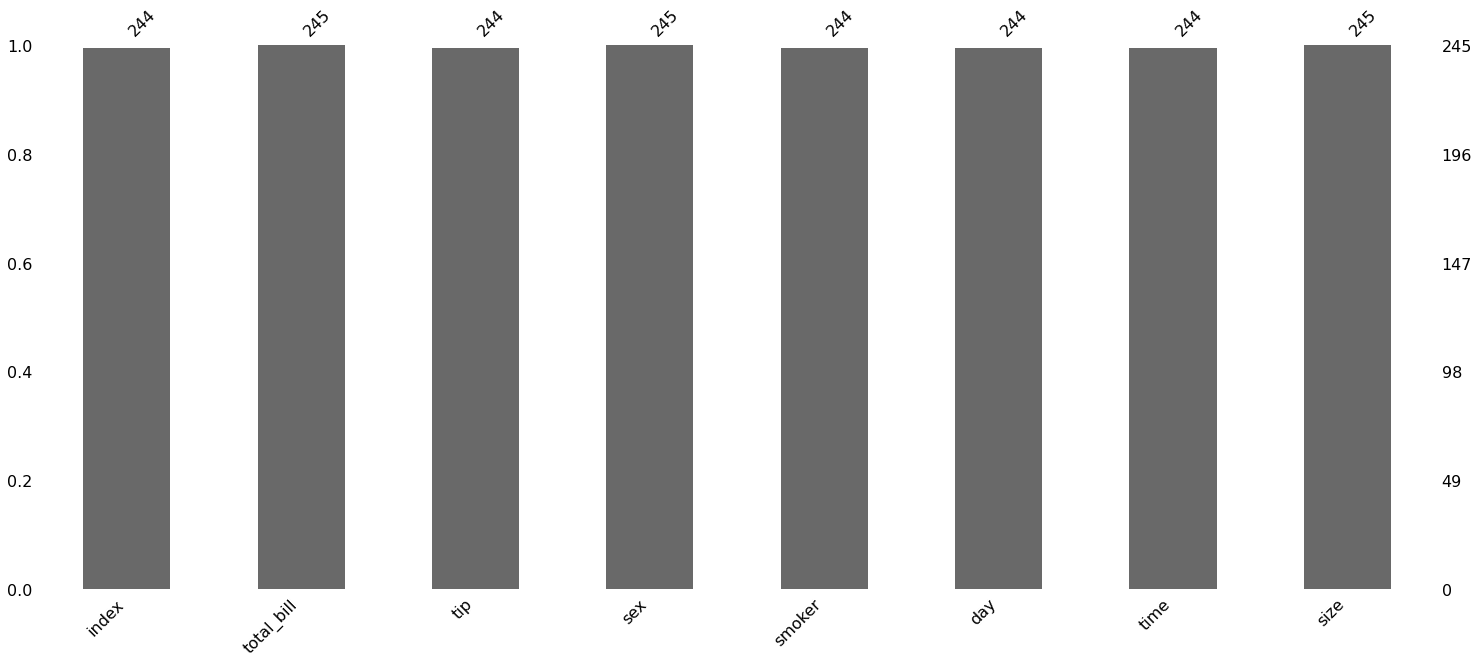

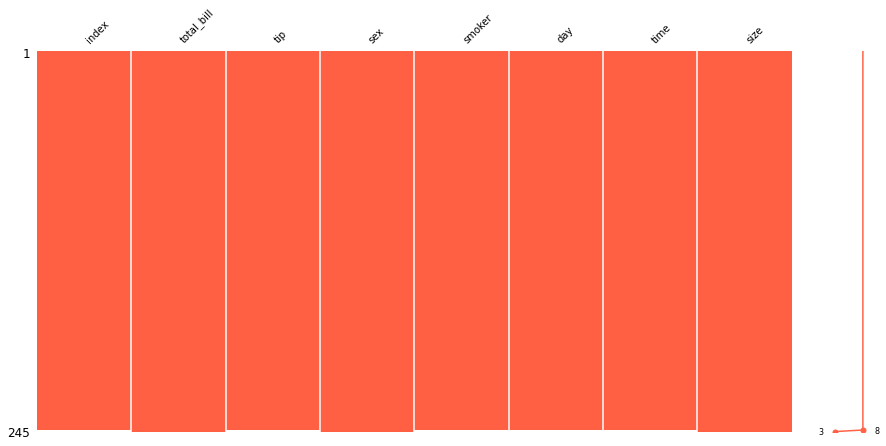

In [18]:
#Plotting a bar graph of the missing values
im = msno.bar(tips_add)
plt.show()
## saving image in a folder
im.get_figure().savefig("images/missing_me2.png")
#plot missing of M & E
msno.matrix(tips_add , figsize=(15,7), fontsize=10, color=(1, 0.38, 0.27))
plt.show()

In [20]:
# c. Use any three different methods under fillna to fill in missing values
median = tips_add['size'].median()
tips_add['size'].fillna(median, inplace=True)
tips_add

,index,total_bill,tip,sex,smoker,day,time,size
0,0.0,16.99,1.01,Female,No,Sun,Dinner,2
1,1.0,10.34,1.66,Male,No,Sun,Dinner,3
2,2.0,21.01,3.50,Male,No,Sun,Dinner,3
3,3.0,23.68,3.31,Male,No,Sun,Dinner,2
4,4.0,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
240,240.0,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241.0,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242.0,17.82,1.75,Male,No,Sat,Dinner,2
243,243.0,18.78,3.00,Female,No,Thur,Dinner,2


#### 14. Use the matplotlib or other to draw the following graphs and assign clear labels and titles:
    a. Histogram
    b. Box and whisker plot
    c. Bar chart
    d. Pie Chart
    e. Juxtaposed Bar chart
    f. Scatter plot
    g. Create a function that allows you to place all the above 6 graphs on one
    image and save this and image and re-import it into your jupyter notebook
    session.

Text(0, 0.5, '')

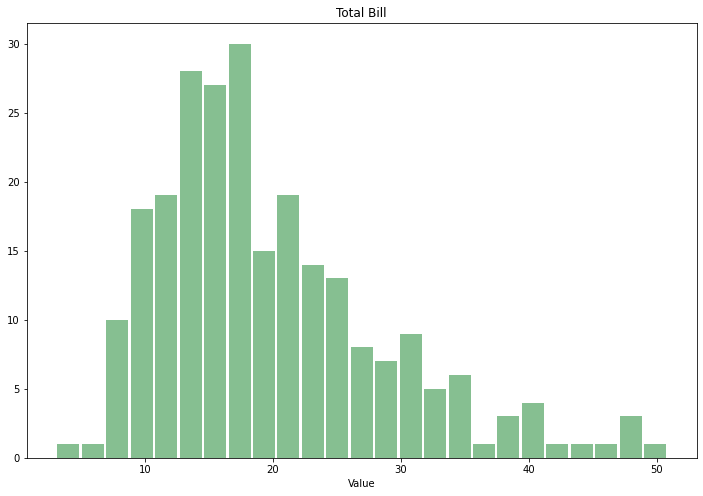

In [30]:
tips_add.hist(column='total_bill',
             bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

plt.title('Total Bill')
plt.xlabel('Value')
plt.ylabel('')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


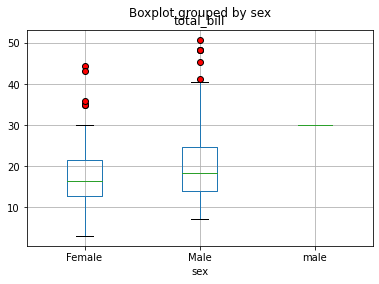

In [41]:
## b. Box and whisker plot
#Using matplotlib to make a boxplot
red_circle = dict(markerfacecolor='red', marker='o')
tips_add.boxplot(column='total_bill', vert=True,flierprops=red_circle,
                by='sex')

In [ ]:
# import seaborn as sns
# sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.boxplot(x="day", y="total_bill", hue="smoker",              
# data=tips, palette="Set3")

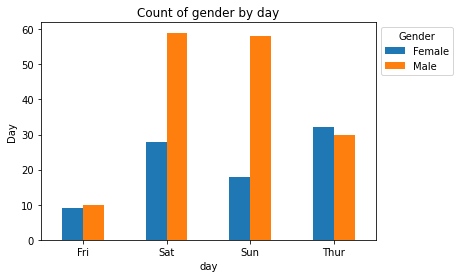

In [42]:
## stacked bar plot of the counts
# Table of sex vs day
sex_table = pd.crosstab(index=tips_add["day"], 
                           columns=tips_add["sex"],
                            rownames=["day"],
                            colnames=["sex"])

bplot2 = sex_table.plot.bar(stacked=False, rot=0)
bplot2.set_ylabel('Count')
bplot2.set_title('Count of gender by day')
bplot2.legend(title='Gender', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

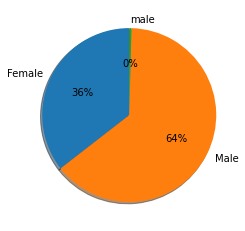

In [44]:
##d. Pie Chart
##plot the % to a piec chart 
## this creates a summary table for the monitoring_evaluation:S0_21
sex_table2 = pd.crosstab(index=tips_add["sex"],  # Make a crosstab
                              columns="count",
                       rownames=[""],
                            colnames=["sex"])

plt.pie(sex_table2['count'] ,  labels=sex_table2.index,
       autopct='%0.f%%', shadow=True, startangle=90)
plt.show()

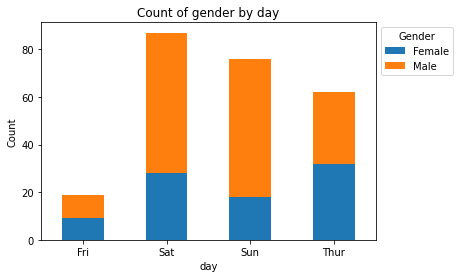

In [45]:
## e. Juxtaposed Bar chart
bplot3 = sex_table.plot.bar(stacked=True, rot=0)
bplot3.set_ylabel('Count')
bplot3.set_title('Count of gender by day')
bplot3.legend(title='Gender', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In [46]:
tips_add

,index,total_bill,tip,sex,smoker,day,time,size
0,0.0,16.99,1.01,Female,No,Sun,Dinner,2
1,1.0,10.34,1.66,Male,No,Sun,Dinner,3
2,2.0,21.01,3.50,Male,No,Sun,Dinner,3
3,3.0,23.68,3.31,Male,No,Sun,Dinner,2
4,4.0,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
240,240.0,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241.0,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242.0,17.82,1.75,Male,No,Sat,Dinner,2
243,243.0,18.78,3.00,Female,No,Thur,Dinner,2


<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:993: UserWarning: Warning: converting a masked element to nan.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\ticker.py:586: UserWarning: Warning: converting a masked element to nan.


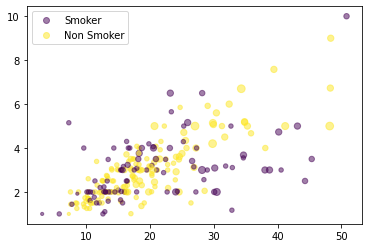

In [52]:
##f. Scatter plot
tips_add['smoker_bin'] = np.where(tips_add['smoker'] =='Yes', 0,1)
 
plt_scat = plt.scatter(x=tips_add['total_bill'],
            y=tips_add['tip'] ,c=tips_add['smoker_bin'] ,
                                    alpha=0.5,
                      s = tips_add['size']*10)
plt.legend(handles=plt_scat.legend_elements()[0], labels=['Smoker','Non Smoker'])

plt.show()

In [ ]:
#g. Create a function that allows you to place all the above 6 graphs on one
#image and save this and image and re-import it into your jupyter notebook
#session.

## Using Plotnine
First, we make up some data. The data we create has y for actual data value and yfit for a hypothetical fitted model. It also has a category column cat.

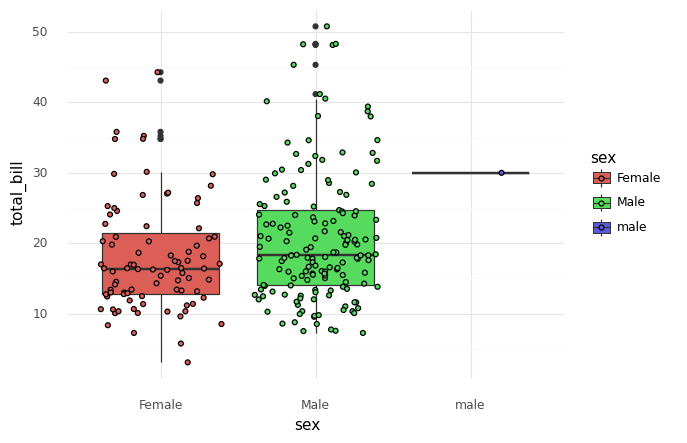

<ggplot: (137927882231)>

In [61]:
(ggplot(tips_add,aes('sex', 'total_bill', fill='sex'))
 + geom_boxplot() 
 +geom_jitter()
 + theme_minimal()
)
